In [58]:
from pathlib import Path

from prepare_data import get_dataframe

crud = get_dataframe(
    Path("../../Static Analysis/impl-crud/crud_package_complexity.csv"),
    application="CRUD"
)
cqrs = get_dataframe(
    Path("../../Static Analysis/impl-es-cqrs/es-cqrs-package-complexity.csv"),
    application="ES CQRS"
)

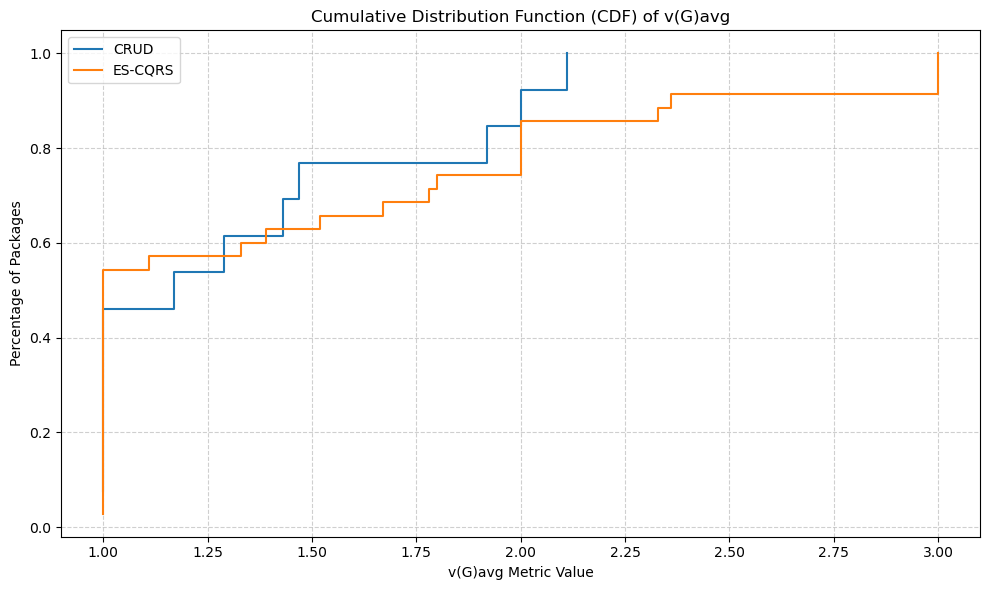

In [60]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

column = "v(G)avg"

for df, label in zip([crud, cqrs], ["CRUD", "ES-CQRS"]):
    # Sort the data
    data = np.sort(df[column])
    # Calculate cumulative proportions (0 to 1)
    y = np.arange(1, len(data) + 1) / len(data)

    # Use step plot for discrete metrics
    plt.step(data, y, label=label, where='post')

plt.title(f'Cumulative Distribution Function (CDF) of {column}')
plt.xlabel(f'{column} Metric Value')
plt.ylabel('Percentage of Packages')

# Format y-axis to show percentages
# plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_yticks()])

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()